In [1]:
import pandas as pd
import numpy as np

In [2]:
from pandas_datareader import data, wb
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
BAC=pd.read_csv('C:\\Users\\Raja\\data analytics\\BAC.csv') 
C=pd.read_csv('C:\\Users\\Raja\\data analytics\\C.csv')
GS=pd.read_csv('C:\\Users\\Raja\\data analytics\\GS.csv')
JPM=pd.read_csv('C:\\Users\\Raja\\data analytics\\JPM.csv')
MS=pd.read_csv('C:\\Users\\Raja\\data analytics\\MS.csv')
WFC=pd.read_csv('C:\\Users\\Raja\\data analytics\\WFC.csv')

In [4]:
BAC['Returns']=BAC['Close'].pct_change()
C['Returns']=C['Close'].pct_change()
GS['Returns']=GS['Close'].pct_change()
JPM['Returns']=JPM['Close'].pct_change()
MS['Returns']=MS['Close'].pct_change()
WFC['Returns']=WFC['Close'].pct_change()

In [5]:
BAC['Date']=pd.to_datetime(BAC['Date'])
C['Date']=pd.to_datetime(C['Date'])
JPM['Date']=pd.to_datetime(JPM['Date'])
MS['Date']=pd.to_datetime(MS['Date'])
GS['Date']=pd.to_datetime(GS['Date'])
WFC['Date']=pd.to_datetime(WFC['Date'])

In [6]:
BAC.set_index('Date',inplace=True)
C.set_index('Date',inplace=True)
GS.set_index('Date',inplace=True)
JPM.set_index('Date',inplace=True)
MS.set_index('Date',inplace=True)
WFC.set_index('Date',inplace=True)

In [11]:
allBanks = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [12]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=allBanks)

In [13]:
bank_stocks.columns.names = ['All Banks','Stock Info']

In [26]:
bank_stocks.head()

All Banks     BAC                                               C         \
Stock Info   Open   High    Low  Close    Volume   Returns   Open   High   
Date                                                                       
2006-01-03  46.92  47.18  46.15  47.08  16296700       NaN  490.0  493.8   
2006-01-04  47.00  47.24  46.45  46.58  17757900 -0.010620  488.6  491.0   
2006-01-05  46.58  46.83  46.32  46.64  14970900  0.001288  484.4  487.8   
2006-01-06  46.80  46.91  46.35  46.57  12599800 -0.001501  488.8  489.0   
2006-01-09  46.72  46.97  46.36  46.60  15620000  0.000644  486.0  487.4   

All Banks                   ...        MS                              WFC  \
Stock Info    Low  Close    ...       Low  Close   Volume   Returns   Open   
Date                        ...                                              
2006-01-03  481.1  492.9    ...     56.74  58.31  5377000       NaN  31.60   
2006-01-04  483.5  483.8    ...     58.35  58.35  7977800  0.000686  31.80   
2006-01-05  484.0  486.2    ...     58.02  58.51  5778000  0.002742  31.50   
2006-01-06  482.0  486.2    ...     58.05  58.57  6889800  0.001025  31.58   
2006-01-09  483.0  483.9    ...     58.62  59.19  4144500  0.010586  31.68   

All Banks                                            
Stock Info   High    Low  Close    Volume   Returns  
Date                                                 
2006-01-03  31.98  31.20  31.90  11016400       NaN  
2006-01-04  31.82  31.36  31.53  10871000 -0.011599  
2006-01-05  31.56  31.31  31.50  10158000 -0.000951  
2006-01-06  31.78  31.38  31.68   8403800  0.005714  
2006-01-09  31.82  31.56  31.68   5619600  0.000000  

[5 rows x 36 columns]

In [15]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

All Banks
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [16]:
returns = pd.DataFrame()

In [97]:
for e in allBanks:
    returns[e+' Return'] = bank_stocks[e]['Close'].pct_change()
returns.fillna(value='None').head()  # replace 'nan' by 'None'

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,None,None,None,None,None,None
2006-01-04,-0.0106202,-0.0184622,-0.0138124,-0.0141826,0.000685989,-0.0115987
2006-01-05,0.00128811,0.00496073,-0.000393422,0.00302877,0.00274207,-0.000951475
2006-01-06,-0.00150086,0,0.0141688,0.0070458,0.00102547,0.00571429
2006-01-09,0.000644192,-0.00473056,0.0120304,0.0162419,0.0105856,0


In [98]:
#returns.drop('2006-01-03')  #here we dont need to write axis=0 because bidefault it takes axis=0 for raw
returns.dropna().head()   #drop the data which contains 'nan' value

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000947


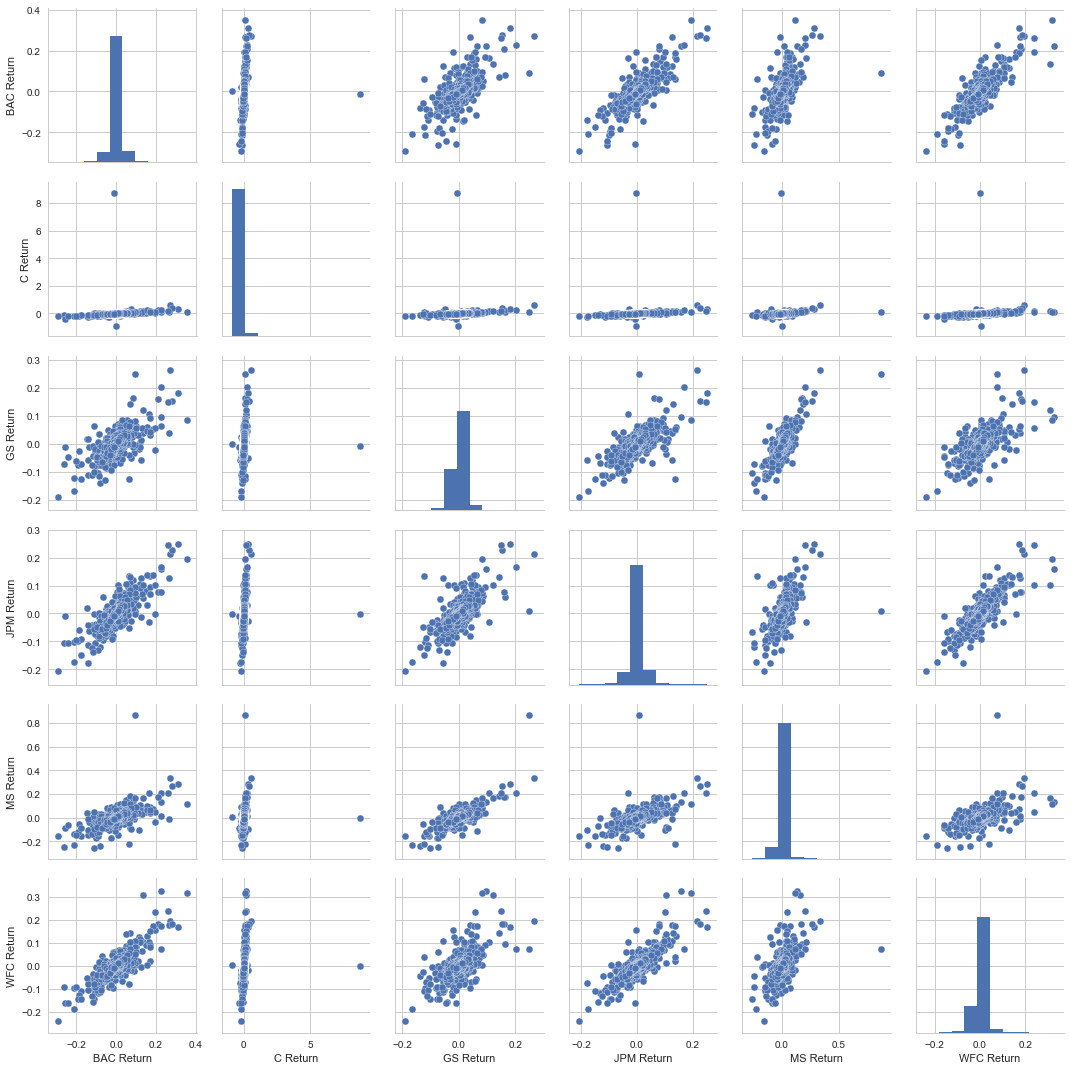

In [105]:
sns.pairplot(returns[1:])

In [100]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [101]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [102]:
returns.std() # Citigroup riskiest

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

In [103]:
returns.ix['2015-01-01':'2015-12-31'].std() # Very similar risk profiles, but Morgan Stanley or BofA

BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

In [104]:
sns.distplot(returns.xs('Returns',level='stock-info',axis=1).ix['2015-01-01':'2015-12-31']['MS Return'],bins=200,color='m')

AttributeError: 'Index' object has no attribute 'get_loc_level'

C:\Users\Raja\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: slice indices must be integers or None or have an __index__ method

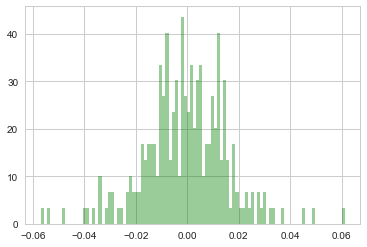

In [106]:
sns.distplot(returns.ix['2015-01-01':'2015-12-31']['MS Return'],color='green',bins=100)

C:\Users\Raja\Anaconda3\lib\site-packages\scipy\stats\stats.py:1626: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


TypeError: slice indices must be integers or None or have an __index__ method

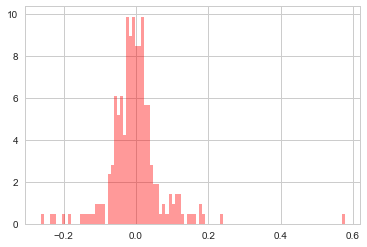

In [107]:
sns.distplot(returns.ix['2008-01-01':'2008-12-31']['C Return'],color='red',bins=100)

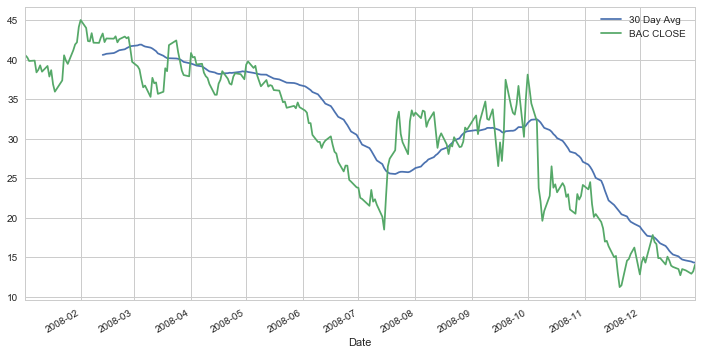

In [108]:
plt.figure(figsize=(12,6))
BAC['Close'].ix['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].ix['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

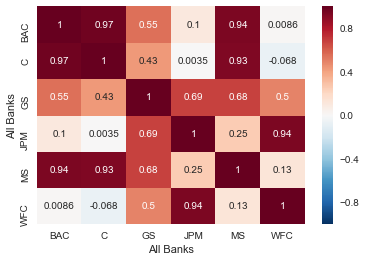

In [109]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

C:\Users\Raja\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


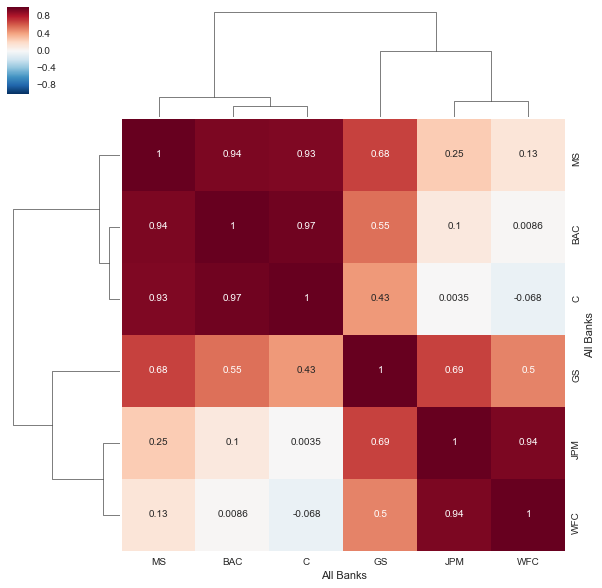

In [110]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)